# Data: 1.5M Beer Reviews from Beer Advocate
(https://s3.amazonaws.com/demo-datasets/beer_reviews.tar.gz)

## Import packages Numpy, Scikit Learn, Pandas and Seaborn

In [1]:
%matplotlib inline
import os
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import warnings
sns.set()

## Import CSV file into a DataFrame

In [2]:
dir_path = os.path.dirname(os.path.abspath('__file__'))
file_path = os.path.join(dir_path, 'beer_reviews.csv')
beer_data = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
beer_data.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

## Split the data into multiple DataFrames
1. Drop any column that is not very informative. Example: "review_time", "brewery_id" 
2. Make a dictionary with individual DataFrames
    
    Example:
    ```
    {
        'review_overall': pd.DataFrame([1.5, 3.0,..,4.5]),
        ...
    }
    ```

In [3]:
beer_data.drop(['brewery_id', 'review_time'], axis=1, inplace=True)
beer_data.head()

,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,Vecchio Birraio,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,Vecchio Birraio,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,Vecchio Birraio,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,Vecchio Birraio,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,Caldera Brewing Company,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
reviews = dict()
for col in beer_data.columns:
    reviews.update({
            col:beer_data[col]
        })

## Visualize Data

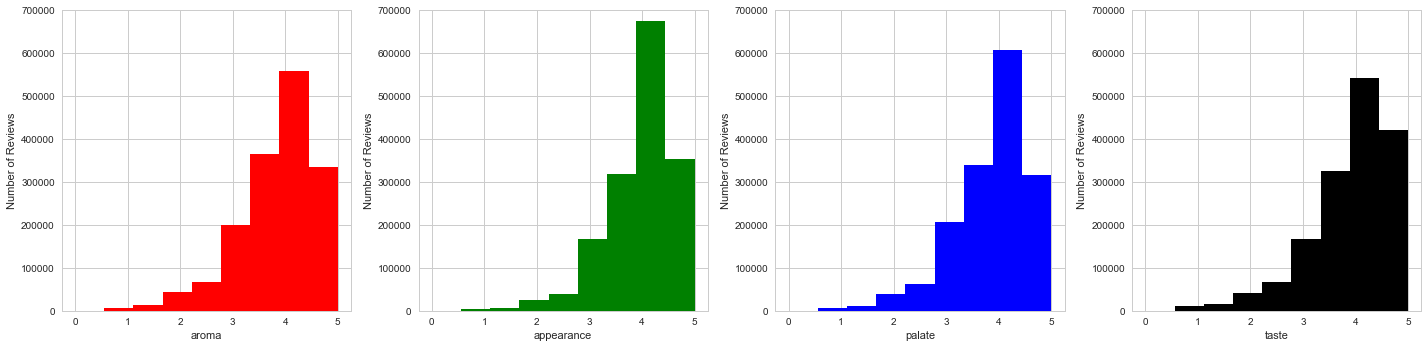

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
_reviews = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']
beer_reviews = beer_data[_reviews].dropna(axis=1)
beer_reviews.head()

fig, ax = plt.subplots(ncols=4, figsize = (20,5))
colors = ['r', 'g', 'b', 'k', 'm']
for idx, head in enumerate(_reviews[1:]):
    plt.subplot(1, len(_reviews[1:]), idx+1)
    plt.ylim(0,7e+05)
    plt.xlabel(head.split('_')[1])
    plt.ylabel('Number of Reviews')
    plt.hist(beer_reviews[head], bins=np.linspace(0, 5, 10), color=colors[idx])
plt.tight_layout(h_pad=1.0)


## Simple Analytics
## Which brewery produces the strongest beers by ABV% ?

### Step1: Data Cleaning
- Extract ABV% data 
- Remove undefined values or "NaN" 
- Remove duplicates. More than one users have rated the beers (duplicate abv% values). However, for sorting and ranking, these things don't matter.

### Step2: Sorting and Ranking
- Sort the data in "beer_abv" column in descending order
- Pick the top one in the list with highest ABV

### Step3: Display Results
- Get other identifiers associated with that beer, Beer Name, Beer Style, Brewery Name etc.
- Additional Info: Display all the beers produced by that brewery

In [10]:
_attribs = ['beer_style', 'beer_abv']
_ids = ['brewery_name', 'beer_name', 'beer_beerid']

#New DataFrame with identifiers and attributes
beer_abvs = beer_data[_ids + _attribs]

#Drop any rows with NaN
beer_abvs = beer_abvs.dropna()

#Drop duplicates and sort values by ABV%
beer_abvs = beer_abvs.drop_duplicates('beer_beerid').sort_values(by="beer_abv", ascending=False)

#Display
beer_abvs.head()

,brewery_name,beer_name,beer_beerid,beer_style,beer_abv
12919,Schorschbräu,Schorschbräu Schorschbock 57%,73368,Eisbock,57.70
12939,Schorschbräu,Schorschbräu Schorschbock 43%,57856,Eisbock,43.00
746310,BrewDog,Sink The Bismarck!,57015,American Double / Imperial IPA,41.00
12934,Schorschbräu,Schorschbräu Schorschbock 40%,55712,Eisbock,39.44
996149,De Struise Brouwers,Black Damnation VI - Messy,70633,American Double / Imperial Stout,39.00


In [11]:
brewery_name = beer_abvs.iloc[0].brewery_name

# Get all the beers produced by that brewery
brews = beer_abvs[beer_abvs.brewery_name == brewery_name]

#Display brews
brews

,brewery_name,beer_name,beer_beerid,beer_style,beer_abv
12919,Schorschbräu,Schorschbräu Schorschbock 57%,73368,Eisbock,57.70
12939,Schorschbräu,Schorschbräu Schorschbock 43%,57856,Eisbock,43.00
12934,Schorschbräu,Schorschbräu Schorschbock 40%,55712,Eisbock,39.44
12918,Schorschbräu,Schorschbräu Schorschbock 31%,51466,Eisbock,30.86
12917,Schorschbräu,Schorsch Weizen 16%,71004,Weizenbock,16.00
12911,Schorschbräu,Schorschbock,47421,Doppelbock,16.00
12928,Schorschbräu,Schorschbräu Donner Weizen,20169,Weizenbock,13.00
12914,Schorschbräu,Schorschbräu Donner Bock,15578,Doppelbock,13.00
12910,Schorschbräu,Schorschbock Ice 13,73357,Eisbock,13.00
12909,Schorschbräu,Schorschbräu Dunkles,32973,Munich Dunkel Lager,4.90


## Visualize Brews

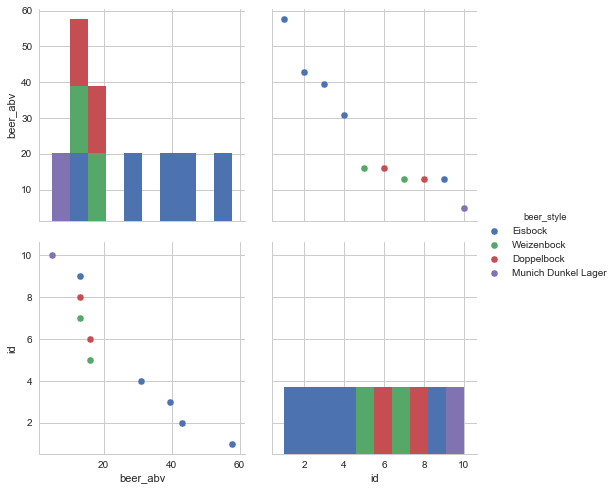

In [12]:
warnings.filterwarnings('ignore')
abvs = brews[['beer_name', 'beer_abv', 'beer_style']]
abvs['id'] = np.linspace(1,len(abvs), len(abvs))
sns.pairplot(data=abvs, hue='beer_style', size=3.5)